# 📝 Project: Tweet Virality Prediction (ML)

In [2]:
# Setup & Load Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [16]:
# Load and inspect data

df = pd.read_csv("tweet_content-engagement_dataset.csv")
df.head()


,Tweet Content,Likes,Retweets,Virality,Number of Hashtags
0,Attended a session on crypto. Didn't get much ...,100,28,Non-Viral,3
1,Layering is key this fall 🍂 #FashionTips,86,12,Non-Viral,1
2,startups is important... or so they say. Still...,81,31,Non-Viral,2
3,coding is the talk of the tech world right now...,2491,1515,Viral,2
4,Layering is key this fall 🍂 #FashionTips,683,325,Viral,1


## Visualizing Data

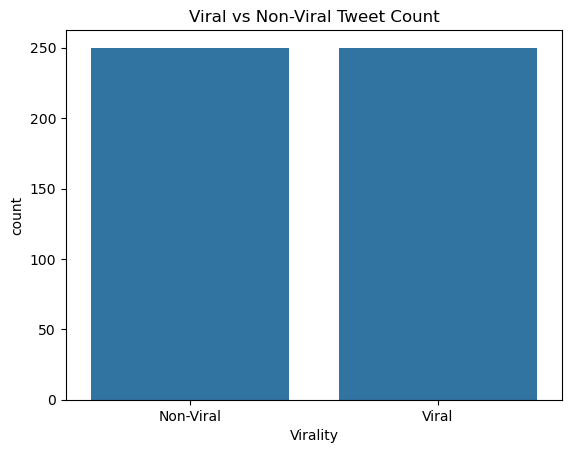

In [21]:
sns.countplot(x='Virality', data=df)
plt.title("Viral vs Non-Viral Tweet Count")
plt.show()


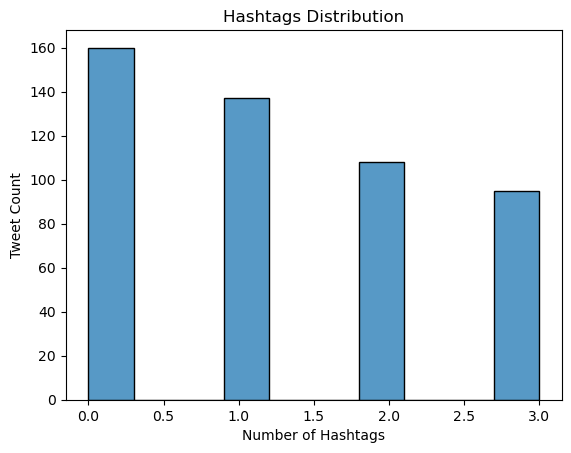

In [43]:
sns.histplot(data=df, x='Number of Hashtags', bins=10)
plt.title("Hashtags Distribution")
plt.xlabel("Number of Hashtags")
plt.ylabel("Tweet Count")
plt.show()


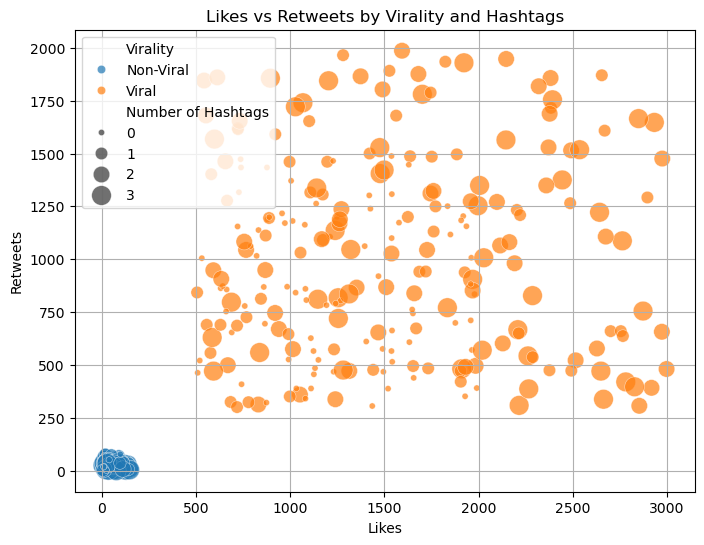

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Likes',
    y='Retweets',
    hue='Virality',
    size='Number of Hashtags',
    sizes=(20, 200),
    alpha=0.7
)
plt.title("Likes vs Retweets by Virality and Hashtags")
plt.xlabel("Likes")
plt.ylabel("Retweets")
plt.grid(True)
plt.show()


## Feature Engineering

In [50]:
# TF-IDF on Tweet Content
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
X_text = tfidf.fit_transform(df['Tweet Content']).toarray()

# Combine TF-IDF with numerical features
X_numerical = df[['Likes', 'Retweets', 'Number of Hashtags']].values
X_combined = np.hstack((X_text, X_numerical))

# Labels
y = df['Virality'].map({'Non-Viral': 0, 'Viral': 1})


In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

In [54]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [56]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[50  0]
 [ 0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

